## Libraries and Data loading

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
from operator import itemgetter
from google.colab import files
import networkx.algorithms.community as nx_comm

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_excel("/content/drive/MyDrive/SNA_Project/data.xlsx", sheet_name=0)

In [ ]:
# st1=pd.read_excel("/content/drive/MyDrive/SNA_Project/data.xlsx", sheet_name=1)
# st2=pd.read_excel("/content/drive/MyDrive/SNA_Project/data.xlsx", sheet_name=2)
# st3=pd.read_excel("/content/drive/MyDrive/SNA_Project/data.xlsx", sheet_name=3)

In [ ]:
import warnings
warnings.filterwarnings("ignore")

# Communities and balance

## Inter-Community

In [ ]:
dfx=df.drop(['POST_ID', 'Timeset'], axis=1)
res = dfx.groupby(by=['Source', 'Target'])['Edge_Weight'].agg(
    pos_edges = lambda x: sum(x == 1),
    neg_edges = lambda x: sum(x == -1)
).reset_index()
print(res)

           Source        Target  pos_edges  neg_edges
0               7  daniel_craig          1          0
1             125   markmywords          1          0
2             195        advice          0          1
3             195         anime          1          0
4             195     askreddit          8          3
...           ...           ...        ...        ...
339639  zyramains   threshmains          1          0
339640       zyzz  bodybuilding          1          0
339641       zyzz       fitness          1          0
339642       zyzz    girlsmirin          1          0
339643   zzseries      toontown          1          0

[339644 rows x 4 columns]


In [ ]:
res_df = pd.DataFrame(res)

In [ ]:
res_df['Sign']=0

In [ ]:
for row in range(0,res_df.shape[0]):
  val=res_df.iloc[row].pos_edges + res_df.iloc[row].neg_edges
  val=val*2/3
  if(res_df.iloc[row].pos_edges>val):
    res_df.loc[row,'Sign']=1
  elif(res_df.iloc[row].neg_edges>val):
    res_df.loc[row,'Sign']=-1
  else:
    res_df.loc[row,'Sign']=0

print(res_df)

           Source        Target  pos_edges  neg_edges  Sign
0               7  daniel_craig          1          0     1
1             125   markmywords          1          0     1
2             195        advice          0          1    -1
3             195         anime          1          0     1
4             195     askreddit          8          3     1
...           ...           ...        ...        ...   ...
339639  zyramains   threshmains          1          0     1
339640       zyzz  bodybuilding          1          0     1
339641       zyzz       fitness          1          0     1
339642       zyzz    girlsmirin          1          0     1
339643   zzseries      toontown          1          0     1

[339644 rows x 5 columns]


In [ ]:
value = {-1:0,0:0,1:0}

In [ ]:
for row in range(0,res_df.shape[0]):
  value[res_df.iloc[row].Sign]+=1
print(value) 

{-1: 18327, 0: 11277, 1: 310040}


In [ ]:
posdf = res_df
posdf = posdf[posdf.Sign==1]
print(posdf)

           Source        Target  pos_edges  neg_edges  Sign
0               7  daniel_craig          1          0     1
1             125   markmywords          1          0     1
3             195         anime          1          0     1
4             195     askreddit          8          3     1
5             195       atheism          1          0     1
...           ...           ...        ...        ...   ...
339639  zyramains   threshmains          1          0     1
339640       zyzz  bodybuilding          1          0     1
339641       zyzz       fitness          1          0     1
339642       zyzz    girlsmirin          1          0     1
339643   zzseries      toontown          1          0     1

[310040 rows x 5 columns]


In [ ]:
posg = nx.from_pandas_edgelist(posdf, 'Source', 'Target')

In [ ]:
communities = nx_comm.louvain_communities(posg)

In [ ]:
large_comm=[]
for eachset in communities:
  if(len(eachset)>=5):
    large_comm.append(eachset)

print(large_comm)

In [ ]:
print(len(communities))

804


In [ ]:
print(len(large_comm))

56


In [ ]:
commu = dict()
for eachset in communities:
  length = (len(eachset)//10)*10
  if not length in commu:
    commu[length]=1
  else:
    commu[length]+=1
commu[0]=0

<BarContainer object of 32 artists>

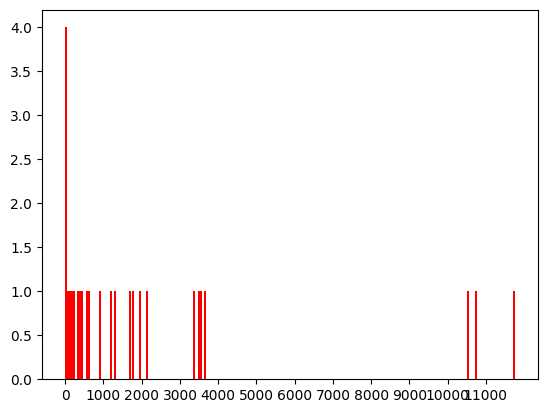

In [ ]:
import matplotlib.ticker as ticker
plt.xticks(np.arange(min(commu.keys()),max(commu.keys()), 1000.0))

plt.bar(commu.keys(), commu.values(),50.0,color='r')

In [ ]:
print(commu)

{0: 0, 11740: 1, 1290: 1, 430: 1, 10: 4, 3550: 1, 560: 1, 920: 1, 110: 1, 400: 1, 3650: 1, 1950: 1, 1690: 1, 620: 1, 20: 1, 1780: 1, 10730: 1, 100: 1, 1310: 1, 160: 1, 370: 1, 40: 1, 2130: 1, 200: 1, 340: 1, 240: 1, 140: 1, 10530: 1, 3500: 1, 610: 1, 1200: 1, 3360: 1}


In [ ]:
sr_set = dict()
i=1
for eachset in large_comm:
  for sr in eachset:
    sr_set[sr]=i
  i=i+1

print(sr_set)

In [ ]:
len(sr_set)

63991

In [ ]:
inter_comm_neg = dict()
for row in range(0,res_df.shape[0]):
  if(res_df.iloc[row].Sign==-1):
    if res_df.iloc[row].Source in sr_set and res_df.iloc[row].Target in sr_set:
      l=[sr_set[res_df.iloc[row].Source], sr_set[res_df.iloc[row].Target]]
      t=tuple(l)
      if not t in inter_comm_neg:
        inter_comm_neg[t]=1
      else:
        inter_comm_neg[t]+=1

print(inter_comm_neg)

In [ ]:
inter_comm_pos = dict()
for row in range(0,res_df.shape[0]):
  if(res_df.iloc[row].Sign==1):
    if res_df.iloc[row].Source in sr_set and res_df.iloc[row].Target in sr_set:
      l=[sr_set[res_df.iloc[row].Source], sr_set[res_df.iloc[row].Target]]
      t=tuple(l)
      if not t in inter_comm_pos:
        inter_comm_pos[t]=1
      else:
        inter_comm_pos[t]+=1

print(inter_comm_pos)

In [ ]:
comm_df = pd.DataFrame()
for (s,t),val in inter_comm_neg.items():
  if s!=t:
    comm_df = comm_df.append(pd.Series([s,t,-val]), ignore_index=True)

for (s,t),val in inter_comm_pos.items():
  if s!=t:
    comm_df = comm_df.append(pd.Series([s,t,val]), ignore_index=True)
headers =  ["source","target","edge_weight"]
comm_df.columns = headers

In [ ]:
comm_df.shape

(879, 3)

In [ ]:
comm_df.to_excel('filename.xlsx', sheet_name = 'New_sheet')
files.download('filename.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
comm_pos_neg = dict()
#intra community positive, intra community negative, inter community positive, inter community negative
for i in range(1,52):
  comm_pos_neg[i]=[]
  if (i,i) in inter_comm_pos:
    comm_pos_neg[i].append(inter_comm_pos[(i,i)])
  else:
    comm_pos_neg[i].append(0)
  if (i,i) in inter_comm_neg:
    comm_pos_neg[i].append(inter_comm_neg[(i,i)])
  else:
    comm_pos_neg[i].append(0)
  valp=0
  valn=0
  for j in range (1,52):
    if j!=i:
      if (i,j) in inter_comm_pos:
        valp+=inter_comm_pos[(i,j)]
      if (i,j) in inter_comm_neg:
        valn+=inter_comm_neg[(i,j)]
  
  comm_pos_neg[i].append(valp)
  comm_pos_neg[i].append(valn)

print(comm_pos_neg)

In [ ]:
pos_pos = dict()
pos_neg = dict()
neg_neg = dict()

for i in range(0,res_df.shape[0]):
  if(res_df.iloc[i].Sign==1):
    if (res_df.iloc[i].Target,res_df.iloc[i].Source) in pos_pos:
      pos_pos[(res_df.iloc[i].Target,res_df.iloc[i].Source)][1] = 1
      del pos_neg[(res_df.iloc[i].Target,res_df.iloc[i].Source)]
    elif (res_df.iloc[i].Target,res_df.iloc[i].Source) in pos_neg:
      pos_neg[(res_df.iloc[i].Target,res_df.iloc[i].Source)][1] = 1
      del neg_neg[(res_df.iloc[i].Target,res_df.iloc[i].Source)]
    else:
      pos_pos[(res_df.iloc[i].Source,res_df.iloc[i].Target)] = [1,0]
      pos_neg[(res_df.iloc[i].Source,res_df.iloc[i].Target)] = [1,0]
  elif(res_df.iloc[i].Sign==-1):
    if (res_df.iloc[i].Target,res_df.iloc[i].Source) in neg_neg:
      neg_neg[(res_df.iloc[i].Target,res_df.iloc[i].Source)][1] = -1
      del pos_neg[(res_df.iloc[i].Target,res_df.iloc[i].Source)]
    elif (res_df.iloc[i].Target,res_df.iloc[i].Source) in pos_neg:
      pos_neg[(res_df.iloc[i].Target,res_df.iloc[i].Source)][1] = -1
      del pos_pos[(res_df.iloc[i].Target,res_df.iloc[i].Source)]
    else:
      neg_neg[(res_df.iloc[i].Source,res_df.iloc[i].Target)] = [-1,0]
      pos_neg[(res_df.iloc[i].Source,res_df.iloc[i].Target)] = [-1,0]


In [ ]:
list_neg_neg = [];
for key,val in neg_neg.items():
  if val == [-1,-1]:
    list_neg_neg.append(key)

In [ ]:
print(len(list_neg_neg))

60


In [ ]:
list_pos_neg = [];
list_neg_pos = [];
for key,val in pos_neg.items():
  if val == [1,-1]:
    list_pos_neg.append(key)
  elif val == [-1,1]:
    list_neg_pos.append(key)

In [ ]:
print(len(list_pos_neg))
print(len(list_neg_pos))

566
623


In [ ]:
list_pos_pos = [];
for key,val in pos_pos.items():
  if val == [1,1]:
    list_pos_pos.append(key)

In [ ]:
print(len(list_pos_pos))

26526


In [ ]:
print(list_neg_pos)

In [ ]:
print(list_pos_neg)

<BarContainer object of 4 artists>

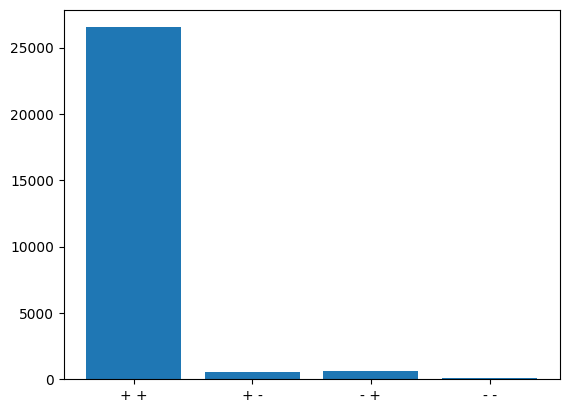

In [ ]:
freq_sam = []
freq_sam.append(len(list_pos_pos))
freq_sam.append(len(list_pos_neg))
freq_sam.append(len(list_neg_pos))
freq_sam.append(len(list_neg_neg))

name =["+ +", "+ -", "- +","- -"]

plt.bar(name, freq_sam)

In [ ]:
print(freq_sam)

[26526, 566, 623, 60]


communities are not targetting other communities.

## Triadic balance

In [ ]:
res_df.head()

,Source,Target,pos_edges,neg_edges,Sign
0,7,daniel_craig,1,0,1
1,125,markmywords,1,0,1
2,195,advice,0,1,-1
3,195,anime,1,0,1
4,195,askreddit,8,3,1


In [ ]:
g1=nx.DiGraph()
for x in range(0,res_df.shape[0]):
  g1.add_edge(res_df.iloc[x].Source,res_df.iloc[x].Target, weight=np.sign(int(res_df.iloc[x].Sign)))

In [ ]:
nodes_list = list(g1)
#nodes_list = list(map(str,nodes_list))
print(nodes_list)

In [ ]:
import copy

In [ ]:
graph_list = []
for i in range(0,len(large_comm)):
  newg=copy.deepcopy(g1)
  for node in nodes_list:
    if not node in large_comm[i]:
      newg.remove_node(node)
  graph_list.append(newg)

In [ ]:
gl2=[]
for gx in graph_list:
  edge_list = list(gx.edges(data=True))

  # Print the edge list with weights
  zero_list = []
  for u, v, data in edge_list:
      if data['weight']==0:
        zero_list.append((u,v))
  #print(zero_list)
  gx.remove_edges_from(zero_list)
  gl2.append(gx)

In [ ]:
# cnt=0
# edge_list = list(g1.edges(data=True))
# for u, v, data in edge_list:
#     if data['weight']==0:
#       cnt+=1
# print(cnt)

In [ ]:
gr_temp = copy.deepcopy(graph_list)

In [ ]:
mapped_list=[]
for gx in gl2:
  mapping=dict(zip(gx.nodes(),range(len(gx.nodes()))))
  gx=nx.relabel_nodes(gx,mapping)
  mapped_list.append(gx)

In [ ]:
import pandas as pd
from networkx import *
import numpy as np
import networkx as nx
import itertools
from itertools import combinations
import time
import pickle
from multiprocessing import Pool


## counting the number of instances in a list
def count_lists(mylist):            
    new_dict = {}
    for i in mylist:
        if i[1] not in new_dict:
            new_dict[i[1]] = 1
        else:
            new_dict[i[1]] += 1
    return (new_dict)            

## Get all triples in triads with respect to their census and edgelists (in edge_atts)
def get_directed_triads(triads):
    # Get all triplets of edges
    for candidate_edges in combinations(triads.items(), 3):
        # Get edges between unique pair of nodes
        unique_edges = set([tuple(sorted(k)) for k,v in candidate_edges])
        # Only consider triad in which the tree edges use a unique pair of nodes
        if len(unique_edges) == 3:
            yield dict(candidate_edges)
            
## searching through traids
def search_triangles(G, nodes = None):
    if nodes is None:
        nodes_nbrs = G.adj.items()
    else:
        nodes_nbrs = ((n, G[n]) for n in G.nbunch_iter(nodes))
    for v, v_nbrs in nodes_nbrs:
        vs = set(v_nbrs) - {v}
        for w in vs:
            #print(w)
            xx = vs & (set(G[w]) - {w})
            yield [ set(x) for x in list(zip(itertools.repeat(v), itertools.repeat(w), list(xx))) ]
            
#Calculate balance in traids (main function)
def calculate_traid_balance(G_new):
    triad_dict = {}
    triad_class = {}
    all_triads = []
    ## there are only 4 transistive census: 030T, 120D, 120U, and 300 
    non_transitive_census = ['003','012', '102', '021D', '021C', '021U', '021', '111U', '111D', '201', '030C', '120C', '210']
    all_triad = nx.triangles(G_new.to_undirected())
    iter_g = search_triangles(G_new)
    
    for iter_t in iter_g:
        for ta in list(iter_t):
            tt = ",".join([str(x) for x in sorted(set(ta))])
            triad_dict[tt] = True
            

    for val in triad_dict.keys():
        nodes = [int(x) for x in val.split(",")]
        census = [k for k, v in nx.triads.triadic_census(G_new.subgraph(nodes)).items() if v][0]
        if census not in non_transitive_census:
            sign = nx.get_edge_attributes(G_new.subgraph(nodes),'weight')
            triad_class[val] = [census, sign]
            #map_census_edges(G_new, val, triad_class)     

    
    for key, value in triad_class.items():
        all_directed_triads = list(get_directed_triads(value[1]))
        all_triads.append([all_directed_triads, value[0]])
            
    ## getting the balance vs. imbalance triads 
    balances = []
    imbalances = []
    for items in all_triads:
        balance_list = []
        
        ## removing two cycles from 300 and then calculate balance
        if items[1] == '300':
            for triangle in items[0]:
                node = []
                for edge in triangle:
                    if edge[0] not in node:
                        node.append(edge[0])
                if len(node) != 3:
                    balance = 1
                    for edge in triangle:
                        balance *= triangle[edge]
                    balance_list.append(balance)
        else:
            for item in items[0]:
                balance = 1
                for edge in item:
                    balance *= item[edge]
                balance_list.append(balance)
        neg = []
        for n in balance_list:
            if n <= 0 :
                neg.append(n)
        if neg:
            imbalances.append(items)
        else:
            balances.append(items)
            
    if(len(balances) + len(imbalances)!=0):
       print('Triad Level Balance: ', (len(balances)/(len(balances) + len(imbalances))))        
    print ('Number of balance and transitive triads: ', len(balances))
    print ('Number of imbalance and transitive triads: ', len(imbalances))
    
    print('Number of balance triads in each census', count_lists(balances))
    print('Number of imbalance triads in each census', count_lists(imbalances))

## iterate through the list of graphs to calculate balance in triads
print ('-------------------------Triadic balance-----------------------------')
for i in range(0,len(mapped_list)):
  print ('index: ', i)
  calculate_traid_balance(mapped_list[i])

-------------------------Triadic balance-----------------------------
index:  0
Triad Level Balance:  0.9262636168464576
Number of balance and transitive triads:  34947
Number of imbalance and transitive triads:  2782
Number of balance triads in each census {'030T': 15431, '300': 3782, '120U': 4789, '120D': 10945}
Number of imbalance triads in each census {'300': 144, '120U': 335, '120D': 842, '030T': 1461}
index:  1
Triad Level Balance:  0.9453781512605042
Number of balance and transitive triads:  225
Number of imbalance and transitive triads:  13
Number of balance triads in each census {'300': 17, '030T': 104, '120U': 52, '120D': 52}
Number of imbalance triads in each census {'030T': 7, '300': 4, '120U': 1, '120D': 1}
index:  2
Number of balance and transitive triads:  0
Number of imbalance and transitive triads:  0
Number of balance triads in each census {}
Number of imbalance triads in each census {}
index:  3
Number of balance and transitive triads:  0
Number of imbalance and tran

In [ ]:
print(len(large_comm[34]))

9


# Temporal Analysis

## Full Data

In [ ]:
dfe = dict()
for row in range(0,df.shape[0]):
  if not df.iloc[row].Source in dfe:
    dfe[df.iloc[row].Source]=df.iloc[row].Edge_Weight
  else:
    dfe[df.iloc[row].Source]+=df.iloc[row].Edge_Weight

In [ ]:
rte =sorted(dfe.items(), key=lambda x: x[1], reverse=True)
print(rte)

In [ ]:
map=dict()
for i in range(0,len(rte)):
  if not math.floor(rte[i][1]/1000)*1000 in map:
    map[math.floor(rte[i][1]/1000)*1000]=1
  else:
    map[math.floor(rte[i][1]/1000)*1000]+=1
print(map)

{14000: 1, 9000: 2, 5000: 2, 4000: 3, 3000: 1, 2000: 6, 1000: 33, 0: 54479, -1000: 1336}


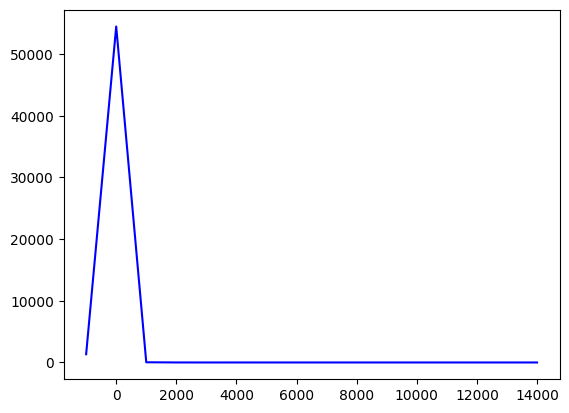

In [ ]:
plt.plot(map.keys(), map.values(),10.0,color='b')

## Sheet-1

In [ ]:
sv1 = dict()
unique_subreddit_s1 = set()
for row in range(0,st1.shape[0]):
  unique_subreddit_s1.add(st1.iloc[row].Source)
  if not st1.iloc[row].Source in sv1:
    sv1[st1.iloc[row].Source]=st1.iloc[row].Edge_Weight
  else:
    sv1[st1.iloc[row].Source]+=st1.iloc[row].Edge_Weight

In [ ]:
SV=sorted(sv1.items(), key=lambda x: x[1], reverse=True)
print(SV)

In [ ]:
map=dict()
for i in range(0,len(SV)):
  if not math.floor(SV[i][1]/10)*10 in map:
    map[math.floor(SV[i][1]/10)*10]=1
  else:
    map[math.floor(SV[i][1]/10)*10]+=1
print(map)

In [ ]:
neg=dict()
for i in range(0,len(SV)):
  if SV[i][1]<0:
    if not math.floor(SV[i][1]/10)*10 in neg:
      neg[math.floor(SV[i][1]/10)*10]=1
    else:
      neg[math.floor(SV[i][1]/10)*10]+=1

In [ ]:
print(neg)

In [ ]:
plt.bar(neg.keys(), neg.values(),10.0,color='g')

## Sheet-2

In [ ]:
sv2 = dict()
unique_subreddit_s2 = set()
for row in range(0,st2.shape[0]):
  unique_subreddit_s2.add(st2.iloc[row].Source)
  if not st2.iloc[row].Source in sv2:
    sv2[st2.iloc[row].Source]=st2.iloc[row].Edge_Weight
  else:
    sv2[st2.iloc[row].Source]+=st2.iloc[row].Edge_Weight

In [ ]:
SV=sorted(sv2.items(), key=lambda x: x[1], reverse=True)
print(SV)

In [ ]:
map=dict()
for i in range(0,len(SV)):
  if not math.floor(SV[i][1]/10)*10 in map:
    map[math.floor(SV[i][1]/10)*10]=1
  else:
    map[math.floor(SV[i][1]/10)*10]+=1
print(map)

In [ ]:
neg2=dict()
for i in range(0,len(SV)):
  if SV[i][1]<0:
    if not math.floor(SV[i][1]/10)*10 in neg2:
      neg2[math.floor(SV[i][1]/10)*10]=1
    else:
      neg2[math.floor(SV[i][1]/10)*10]+=1

In [ ]:
print(neg2)

In [ ]:
plt.bar(neg2.keys(), neg2.values(),8.0,color='b')

## Sheet-3

In [ ]:
sv3 = dict()
unique_subreddit_s3 = set()
for row in range(0,st3.shape[0]):
  unique_subreddit_s3.add(st3.iloc[row].Source)
  if not st3.iloc[row].Source in sv3:
    sv3[st3.iloc[row].Source]=st3.iloc[row].Edge_Weight
  else:
    sv3[st3.iloc[row].Source]+=st3.iloc[row].Edge_Weight

In [ ]:
SV=sorted(sv3.items(), key=lambda x: x[1], reverse=True)
print(SV)

In [ ]:
map=dict()
for i in range(0,len(SV)):
  if not math.floor(SV[i][1]/10)*10 in map:
    map[math.floor(SV[i][1]/10)*10]=1
  else:
    map[math.floor(SV[i][1]/10)*10]+=1
print(map)

In [ ]:
neg3=dict()
for i in range(0,len(SV)):
  if SV[i][1]<0:
    if not math.floor(SV[i][1]/10)*10 in neg3:
      neg3[math.floor(SV[i][1]/10)*10]=1
    else:
      neg3[math.floor(SV[i][1]/10)*10]+=1

In [ ]:
print(neg3)

In [ ]:
plt.bar(neg3.keys(), neg3.values(),10.0,color='r')

In [ ]:
print(len(unique_subreddit_s1))
print(len(unique_subreddit_s2))
print(len(unique_subreddit_s3))

# Graph metrics

In [ ]:
# G = nx.MultiDiGraph()
# G = nx.from_pandas_edgelist(df, source="Source", target="Target", edge_attr=["Edge_Weight","Timeset"])

In [ ]:
# nx.draw(G, with_labels=True)
# plt.show()

In [ ]:
degree_distribution = dict(G.degree())
avg_clustering_coefficient = nx.average_clustering(G,weight="Edge_Weight")
transitivity = nx.transitivity(G)
assortativity = nx.degree_assortativity_coefficient(G,weight="Edge_Weight")

In [ ]:
print("Degree distribution:", degree_distribution)
print("Weighted Average clustering coefficient:", avg_clustering_coefficient)
print("Transitivity:", transitivity)
print("Weighted Assortativity:", assortativity)

In [ ]:
Degree = sorted(degree_distribution.items(), key=lambda x: x[1], reverse=True)
print(Degree)

In [ ]:
pr = nx.pagerank(G,alpha=0.85,tol=1e-06)
print(pr)

In [ ]:
sorted_pr = sorted(pr.items(), key=lambda x: x[1], reverse=True)
print(sorted_pr)

In [ ]:
top = sorted_pr[:5]
name = [t[0] for t in top]
score = [t[1] for t in top]
plt.bar(name, score)
plt.xlabel('SubReddit ID')
plt.ylabel('PageRank Score')
plt.title('Top 5 Nodes by PageRank Score')
plt.show()

In [ ]:
# Gn= nx.DiGraph()
# Gn = nx.from_pandas_edgelist(res_df, source="Source", target="Target", edge_attr=["Sign"])
# res_df.to_excel('filename.xlsx', sheet_name = 'New_sheet')
# files.download('filename.xlsx')

# Extra

In [ ]:
# signed_betweenness = nx.betweenness_centrality(G, weight="Edge_Weight")
# print(signed_betweenness)

In [ ]:
# signed_modularity = nx.algorithms.community.modularity(G, weight="Edge_Weight")
# print(signed_modularity) (!!need to build communities then use this!!)

In [ ]:
# hubs, authorities = nx.hits(G,max_iter=100,tol=1e-04,normalized = False)
# print("Hub Scores: ", hubs)
# print("Authority Scores: ", authorities)

In [ ]:
# Hubs = sorted(hubs.items(), key=lambda x: x[1], reverse=True)
# print(Hubs)

In [ ]:
# Authorities = sorted(authorities.items(), key=lambda x: x[1], reverse=True)
# print(Authorities)